In [ ]:
# Justificación del algoritmo
Elegí Linear Regression (con Ridge para regularización) como alterno a Random Forest porque asume una relación lineal simple entre bateos y runs (correlación 0.611), es interpretable (coeficientes directos) y eficiente para datasets pequeños (30 muestras). Ridge optimiza evitando overfitting en data limitada.

# Descripción del diseño del modelo (paso a paso)
- Cargar y limpiar nombres de equipos.
- Split 80/20.
- Exploratorio: Scatter y correlación.
- Modelo: GridSearchCV en Ridge (alpha para regularización).
- Fit y predict.
- Métricas y gráficas.
- Guardar modelo.

# Enlace al Repositorio
 # https://github.com/axelcortes1113/DE-breast-cancer-xgboost-beisbol-linear-reg

In [2]:
# # Predicción de Runs en Béisbol usando Linear Regression
# Dataset: beisbol.csv (30 equipos MLB 2008)

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV  # Para Ridge/ Lasso alterno, pero aquí simple
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
# Estilos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Cargar datos
df = pd.read_csv("beisbol.csv")
print(df.shape)
df.head()

(30, 4)


,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [4]:
# Preprocesamiento
df['equipos'] = df['equipos'].str.replace('_', ' ').str.strip()
X = df[['bateos']]
y = df['runs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

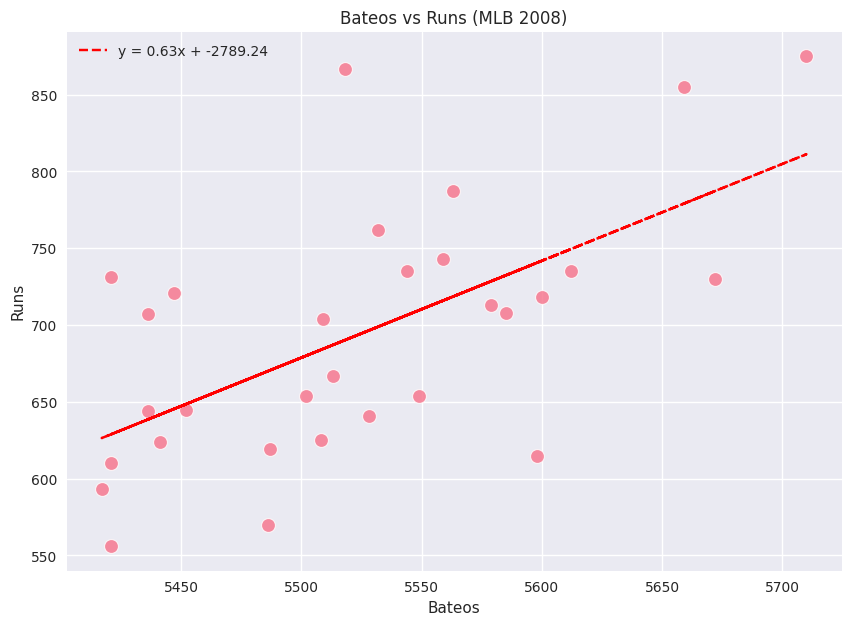

Correlación: 0.611


In [5]:
# 1. Análisis exploratorio y gráfica de dispersión

# %%
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='bateos', y='runs', s=100, alpha=0.8)
z = np.polyfit(df['bateos'], df['runs'], 1)
p = np.poly1d(z)
plt.plot(df['bateos'], p(df['bateos']), "r--", label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
plt.title('Bateos vs Runs (MLB 2008)')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.show()

corr, _ = pearsonr(df['bateos'], df['runs'])
print(f"Correlación: {corr:.3f}")

In [6]:
# 2. Modelo: Linear Regression (simple, no hiperparámetros complejos; optimizamos con Ridge para alterno)

# %%
from sklearn.linear_model import Ridge
ridge = Ridge()

param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Mejores params:", grid_search.best_params_)
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

Mejores params: {'alpha': 100}


,alpha,100
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [7]:
y_pred = best_lr.predict(X_test)

In [8]:
print("\n=== Linear Regression Optimizado (Test) ===")
print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")


=== Linear Regression Optimizado (Test) ===
R²: -0.517
RMSE: 72.24
MAE: 51.61


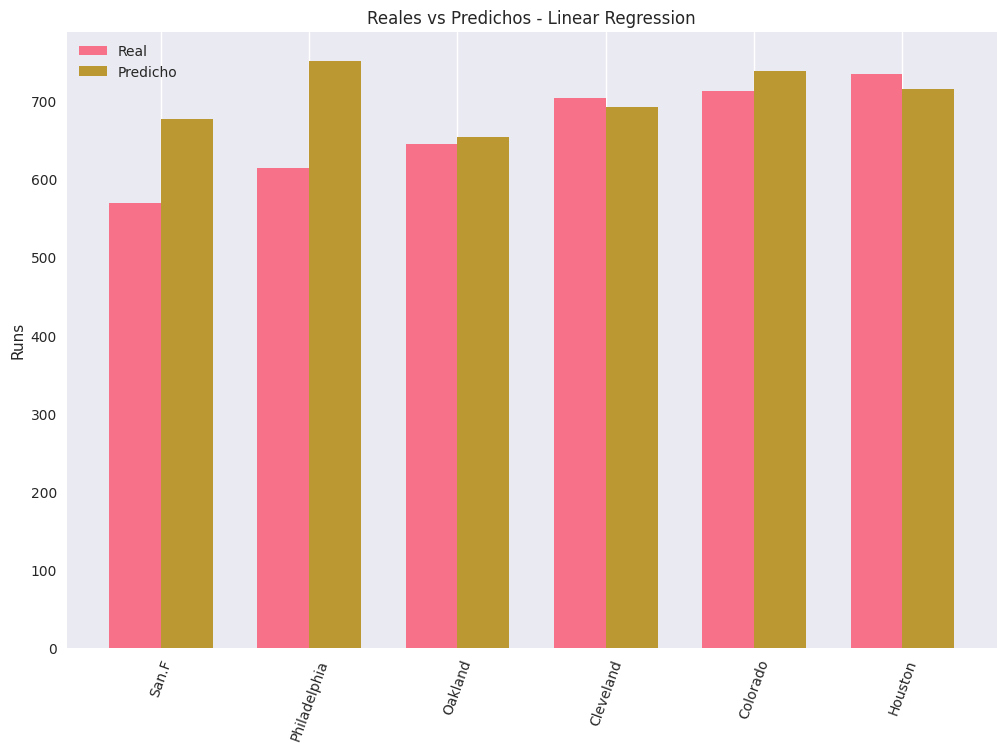

In [9]:
# 3. Gráficas: Reales vs Predichos

# %%
comparacion = pd.DataFrame({'Real': y_test, 'Predicho': y_pred}).sort_values('Real')
plt.figure(figsize=(12, 8))
x = np.arange(len(comparacion))
width = 0.35
plt.bar(x - width/2, comparacion['Real'], width, label='Real')
plt.bar(x + width/2, comparacion['Predicho'], width, label='Predicho')
plt.xticks(x, df.loc[y_test.index, 'equipos'], rotation=70)
plt.title('Reales vs Predichos - Linear Regression')
plt.ylabel('Runs')
plt.legend()
plt.grid(axis='y')
plt.show()

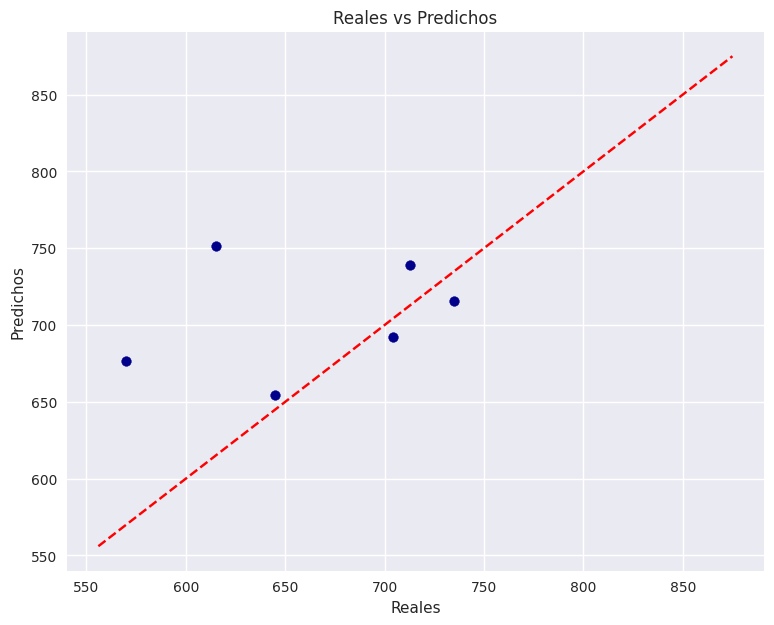

In [10]:
# Scatter reales vs pred
plt.figure(figsize=(9, 7))
plt.scatter(y_test, y_pred, color='darkblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Reales')
plt.ylabel('Predichos')
plt.title('Reales vs Predichos')
plt.grid(True)
plt.show()

In [11]:
# Guardar
import joblib
joblib.dump(best_lr, 'best_lr_modelDE.pkl')
print("Modelo guardado")

Modelo guardado
